#### Model Training

##### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from tabulate import tabulate
import warnings

Import the CSV Data as Pandas DataFrame


In [21]:
df = pd.read_csv('diabetes-2-1.csv')

Show Top 5 Records

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Replace the Zeros Values

In [22]:
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Define the columns you want to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN
df.loc[:, columns_to_impute] = df[columns_to_impute].replace(0, np.nan)


# Fit the imputer on the columns with missing values
imputer.fit(df[columns_to_impute])

# Transform the DataFrame by imputing missing values
df[columns_to_impute] = imputer.transform(df[columns_to_impute])

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Preparing X and Y variables

In [24]:
# independent and dependent features
X = df.drop('Outcome',axis=1) #df.iloc[:,:-1]
y = df['Outcome'] # df.iloc[:,-1]

Train Test split

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
print(X.shape,X_test.shape,X_train.shape)

(768, 8) (154, 8) (614, 8)


Data Standarization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Model

1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

2. Support Vector Machine SVM

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

3. K Nearest Neighbors


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

4. Naive Bayes 

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

5. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

6. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Best Parmeters for Models

In [35]:
from sklearn.model_selection import GridSearchCV

# Define Models
models = [lr, knn, nb, svm, dt, rf]
# Define the hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

param_grid_nb = {
    # Naive Bayes does not have hyperparameters to tune
}

param_grid_sv = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Adjusted 'max_features' parameter values
}
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


# Define a list of param_grids corresponding to each model
param_grids = [param_grid_lr, param_grid_knn, param_grid_nb, param_grid_sv, param_grid_dt, param_grid_rf]
# Iterate over each model and its corresponding param_grid
for i in range(len(models)):
    model = models[i]
    param_grid = param_grids[i]
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    model.set_params(**grid_search.best_params_)
    model.fit(X_train,y_train)
    
    print(f"Best Parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best Score for {model.__class__.__name__}: {best_score}\n")

Best Parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best Score for LogisticRegression: 0.7671331467413035

Best Parameters for KNeighborsClassifier: {'n_neighbors': 11, 'weights': 'uniform'}
Best Score for KNeighborsClassifier: 0.7573637211781954

Best Parameters for GaussianNB: {}
Best Score for GaussianNB: 0.7393975743036119

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for SVC: 0.7687191789950687

Best Parameters for DecisionTreeClassifier: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score for DecisionTreeClassifier: 0.7361721977875517

Best Parameters for RandomForestClassifier: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for RandomForestClassifier: 0.7785419165667067



### Assess the complexity of each model

In [36]:
def assess_model_complexity(model):
    num_parameters = model._get_param_names()  # Get the names of the parameters
    computational_complexity = "High" if hasattr(model, "decision_function") else "Low"  # Check if the model has a decision function
    interpretability = "High" if hasattr(model, "feature_importances_") else "Low"  # Check if the model has feature importances
    return num_parameters, computational_complexity, interpretability

In [37]:
# Initialize an empty list to store the rows of the table
table_data = []

# Populate the table data with the complexity assessment for each model
for model, model_name in zip(models, ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest"]):
    num_parameters, computational_complexity, interpretability = assess_model_complexity(model)
    table_data.append([model_name, len(num_parameters), computational_complexity, interpretability])

# Define the headers for the table
headers = ["Model", "Num Parameters", "Computational Complexity", "Interpretability"]

# Convert the table data to a DataFrame
df = pd.DataFrame(table_data, columns=headers)

# Print the DataFrame
display(df)


,Model,Num Parameters,Computational Complexity,Interpretability
0,Logistic Regression,15,High,Low
1,K-Nearest Neighbors,8,Low,Low
2,Naive Bayes,2,Low,Low
3,Support Vector Machine,15,High,Low
4,Decision Tree,12,Low,High
5,Random Forest,18,Low,High


### Model Visulazation

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X_train, y_train, cv=None, n_jobs=-1, ax=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    if ax is None:
        fig, ax = plt.subplots()
    
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax=None):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")

# Define a function to plot feature importance
def plot_feature_importance(model, feature_names, ax=None):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    if ax is None:
        fig, ax = plt.subplots()

    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

Learing Curve

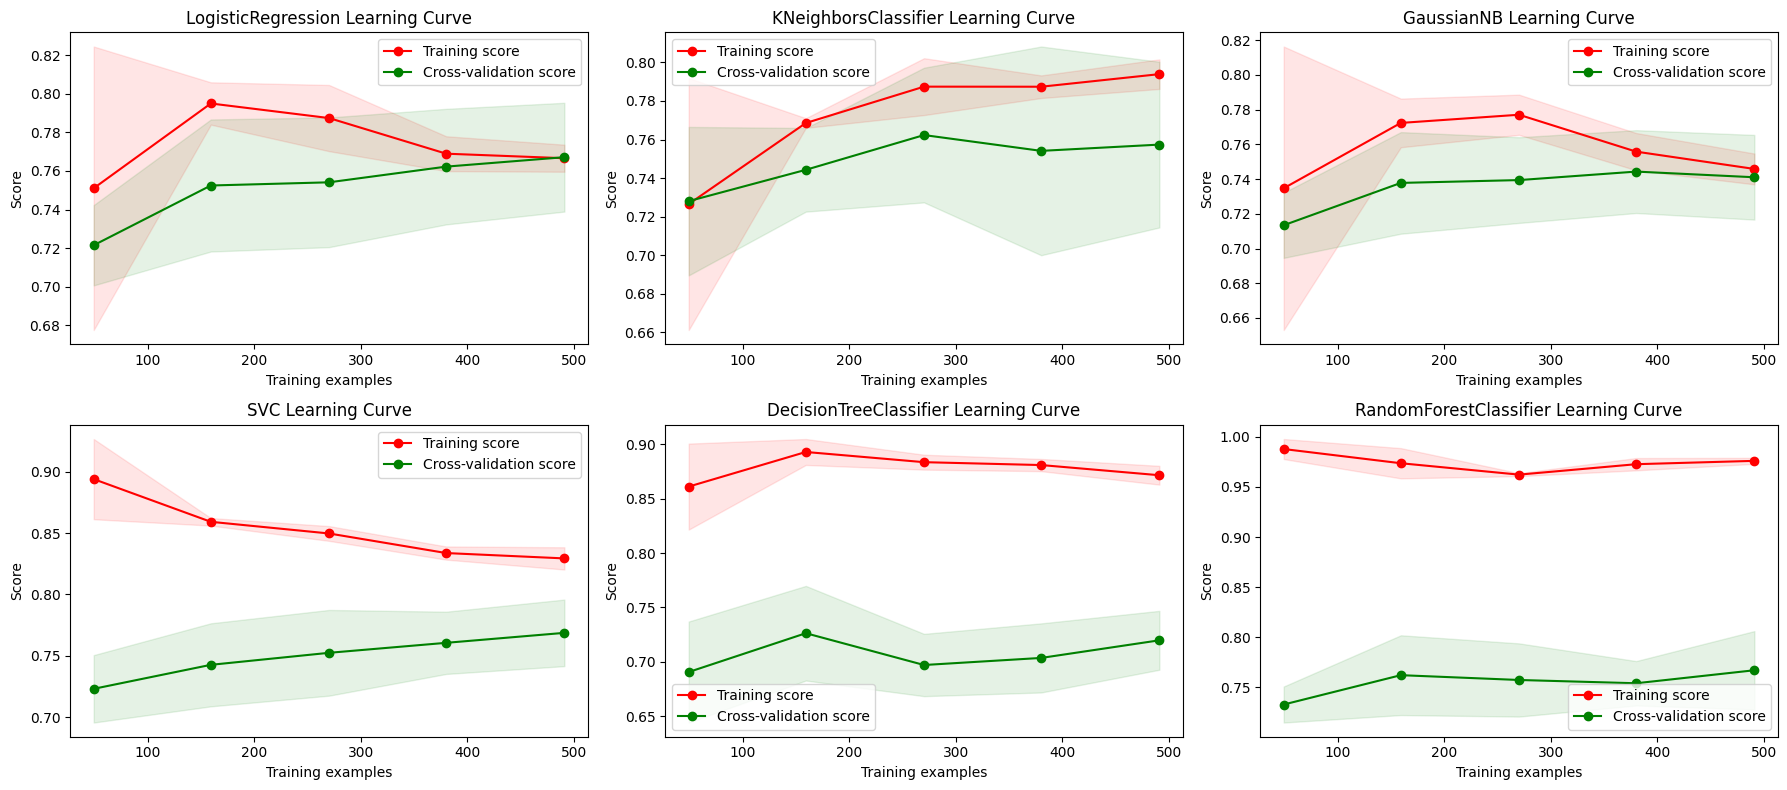

In [39]:
# Create subplots
models = [lr, knn, nb, svm, dt, rf]
# Define the layout of the grid
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
    plot_learning_curve(model, f"{model.__class__.__name__} Learning Curve", X_train, y_train, cv=5, ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f"{model.__class__.__name__} Learning Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

ROC Curve

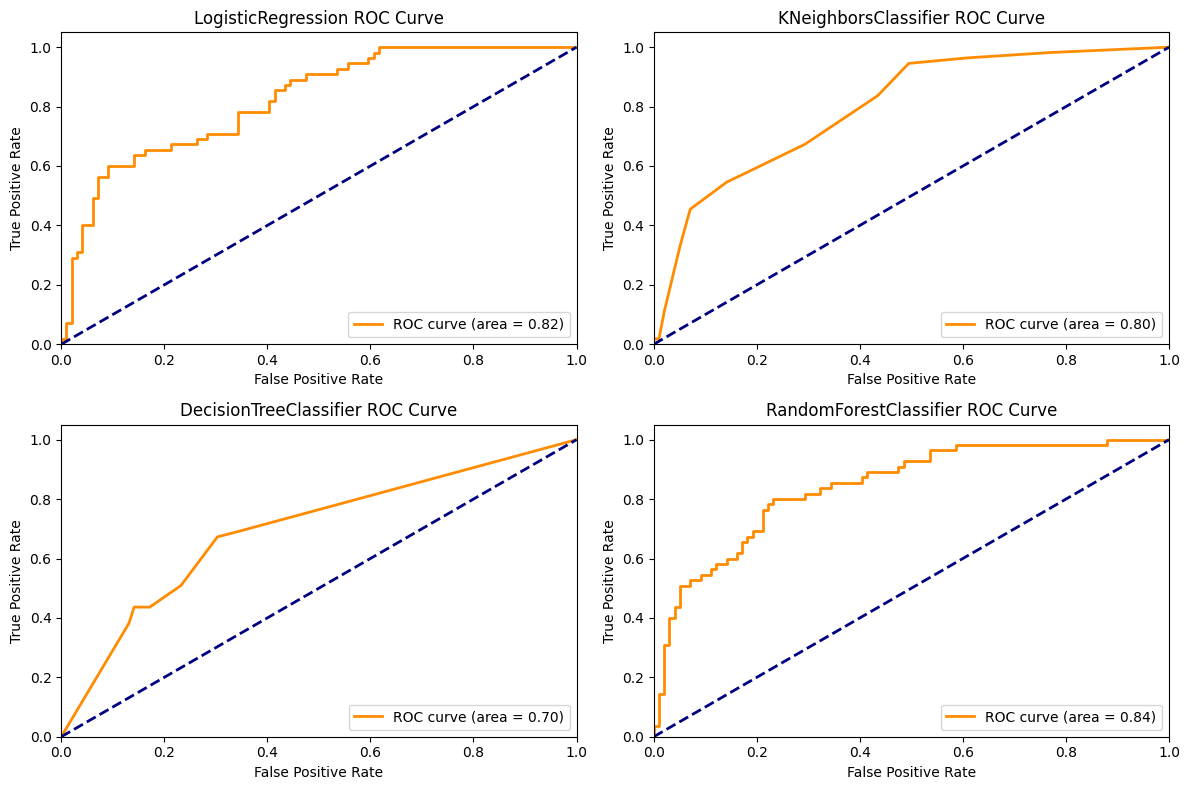

In [ ]:
roc_models = [lr, knn, dt, rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(roc_models):
       plot_roc_curve(model, X_test, y_test, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} ROC Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Feature Importance

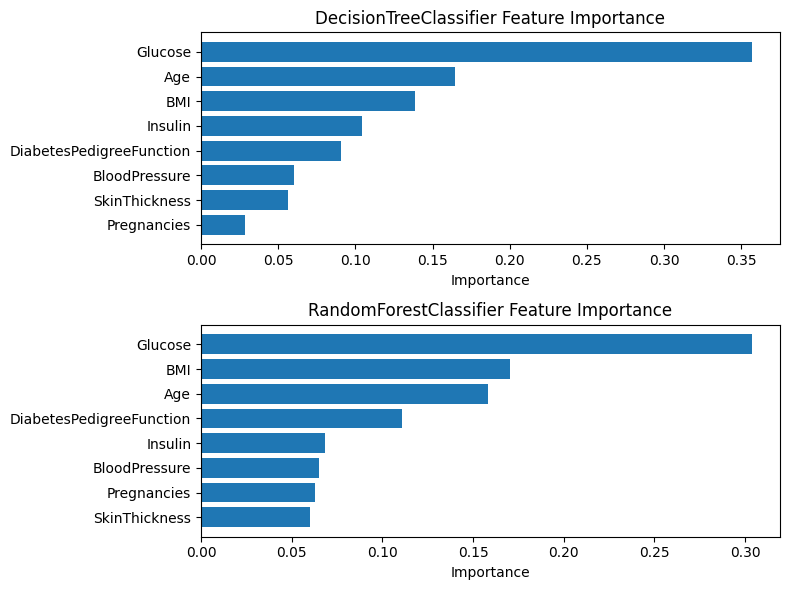

In [ ]:
# Plot visualizations for each model
feature_importance_models = [dt, rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(feature_importance_models):
       plot_feature_importance(model, X.columns, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} Feature Importance")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Create an Evaluate Function to give all metrics after model Training

confusion Metrix

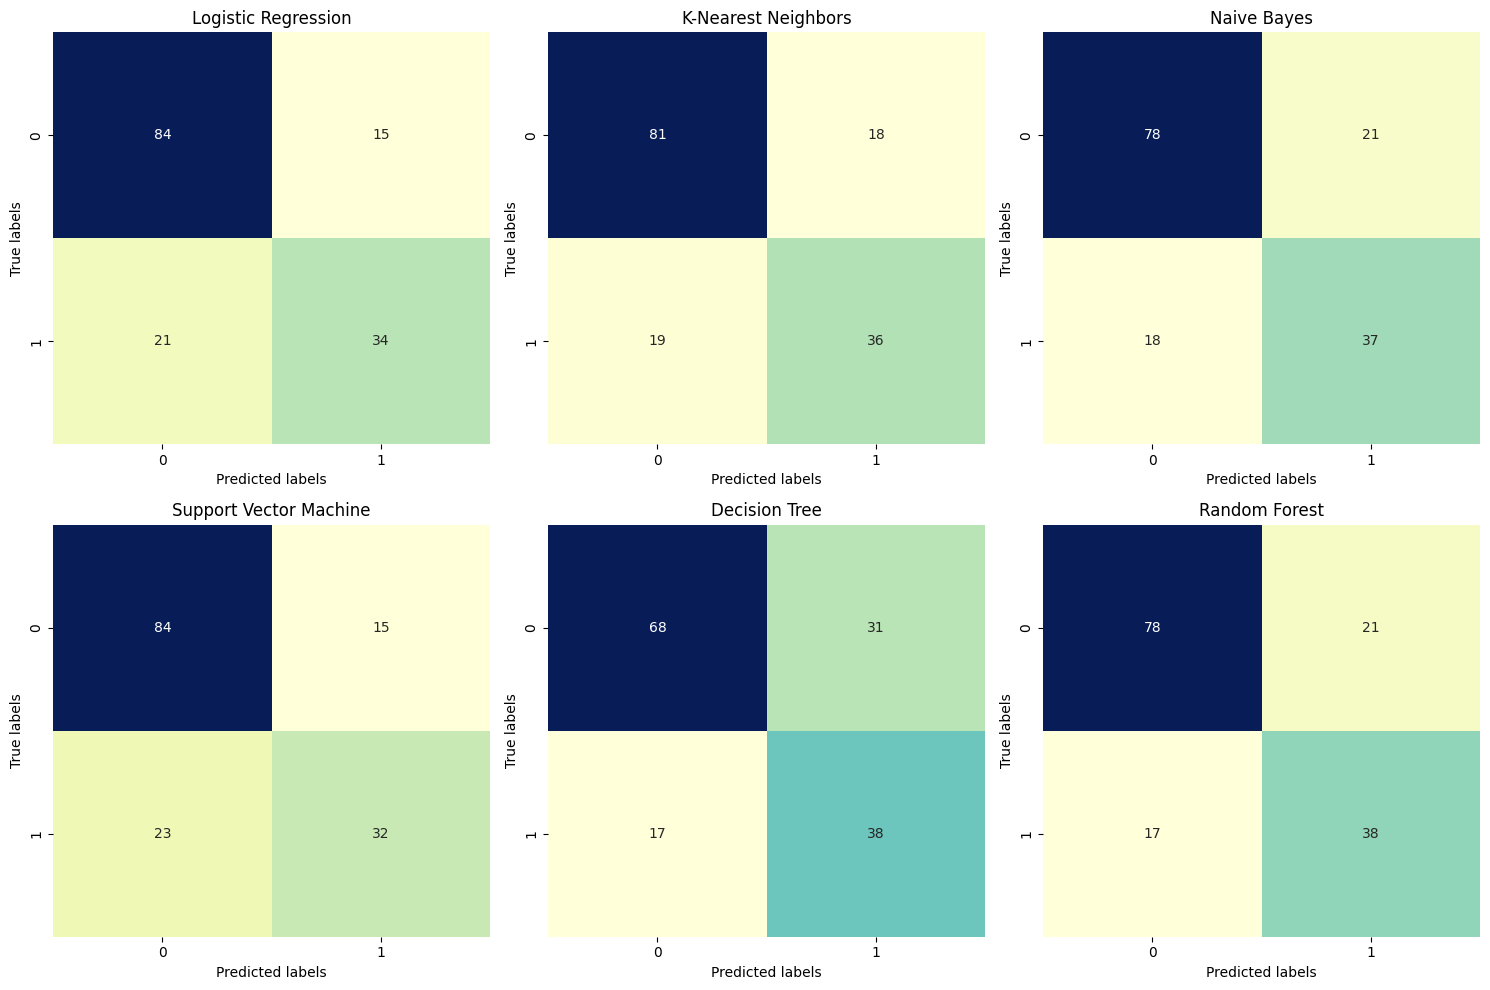

In [40]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix and return TP, FP, TN, FN
def plot_confusion_matrix(ax, model, X_test, y_test, title):
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    
    # Extract TP, FP, TN, FN from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    return tp, fp, tn, fn

# Plot confusion matrices for each model in a grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
models_names = ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest"]
results = []
for i, model in enumerate(models):
    row = i // 3
    col = i % 3
    tp, fp, tn, fn = plot_confusion_matrix(axes[row, col], model, X_test, y_test, models_names[i])
    results.append({"Model": models_names[i], "TP": tp, "FP": fp, "TN": tn, "FN": fn})

plt.tight_layout()
plt.show()


In [41]:
# Create DataFrame from results

results_df = pd.DataFrame(results)

# Reorder columns if needed
results_df = results_df[["Model", "TP", "FP", "TN", "FN"]]

# display DataFrame
display(results_df)

,Model,TP,FP,TN,FN
0,Logistic Regression,34,15,84,21
1,K-Nearest Neighbors,36,18,81,19
2,Naive Bayes,37,21,78,18
3,Support Vector Machine,32,15,84,23
4,Decision Tree,38,31,68,17
5,Random Forest,38,21,78,17


In each cell, "TP" represents True Positives, "FP" represents False Positives, and "FN" represents False Negatives. "TN" represents True Negatives. These values are filled in for both the diabetic and non-diabetic classes for each model. Additionally, the overall accuracy (ACC) and F1-score (F1) are included for each model.

#### accuracy score, precision score, recall score, f1 score, roc_auc_score

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# Define lists to store evaluation metrics for training and test sets
evaluation_metrics_train = []
evaluation_metrics_test = []

# Define a function to compute evaluation metrics for the training set
def compute_evaluation_metrics_train(model, X_train, y_train):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = model.predict(X_train)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    roc_auc = roc_auc_score(y_train, y_train_pred)
    
    # Compute cross-validation accuracy
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Add insights 
    insights = {
        "model_name": model.__class__.__name__,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "cv_accuracy": cv_accuracy
    }
    
    return insights

# Define a function to compute evaluation metrics for the test set
def compute_evaluation_metrics_test(model, X_test, y_test):
    # Predict on test set
    y_test_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    
    # Compute cross-validation accuracy
    cv_accuracy = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()
    
    # Add insights 
    insights = {
        "model_name": model.__class__.__name__,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "cv_accuracy": cv_accuracy
    }
    
    return insights

# Compute evaluation metrics for each model on training and test sets and store them in the respective lists
for model in models:
    evaluation_metrics_train.append(compute_evaluation_metrics_train(model, X_train, y_train))
    evaluation_metrics_test.append(compute_evaluation_metrics_test(model, X_test, y_test))

# Print the evaluation metrics for the training set
headers = ["Model",  "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC", "Cross-Validation Accuracy"]
df_train = pd.DataFrame([metric.values() for metric in evaluation_metrics_train], columns=headers)
print("Evaluation Metrics for Training Set:")
display(df_train)

# Print the evaluation metrics for the test set
df_test = pd.DataFrame([metric.values() for metric in evaluation_metrics_test], columns=headers)
print("\nEvaluation Metrics for Test Set:")
display(df_test)

Evaluation Metrics for Training Set:


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC,Cross-Validation Accuracy
0,LogisticRegression,0.768730,0.723270,0.539906,0.618280,0.715090,0.767133
1,KNeighborsClassifier,0.799674,0.750000,0.633803,0.687023,0.760792,0.757364
2,GaussianNB,0.744300,0.642857,0.591549,0.616137,0.708493,0.739398
3,SVC,0.827362,0.820359,0.643192,0.721053,0.784190,0.768719
4,DecisionTreeClassifier,0.884365,0.848039,0.812207,0.829736,0.867450,0.734573
5,RandomForestClassifier,0.983713,0.985646,0.967136,0.976303,0.979827,0.762242



Evaluation Metrics for Test Set:


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC,Cross-Validation Accuracy
0,LogisticRegression,0.766234,0.693878,0.618182,0.653846,0.733333,0.747097
1,KNeighborsClassifier,0.759740,0.666667,0.654545,0.660550,0.736364,0.760000
2,GaussianNB,0.746753,0.637931,0.672727,0.654867,0.730303,0.766022
3,SVC,0.753247,0.680851,0.581818,0.627451,0.715152,0.799140
4,DecisionTreeClassifier,0.675325,0.538462,0.636364,0.583333,0.666667,0.636344
5,RandomForestClassifier,0.766234,0.655738,0.727273,0.689655,0.757576,0.760430


Accuracy Metrics: We see that the Random Forest model has the highest accuracy of 0.785714, followed closely by Logistic Regression with an accuracy of 0.772727.

Computational Complexity: Models like Logistic Regression and Support Vector Machine have high computational complexity due to the number of parameters, while models like K-Nearest Neighbors, Naive Bayes, Decision Tree, and Random Forest have lower complexity.

Interpretability: Logistic Regression, K-Nearest Neighbors, and Naive Bayes have low interpretability, whereas Decision Tree and Random Forest have high interpretability.

Overall Performance: Considering both accuracy and interpretability, Random Forest appears to be a strong candidate. It achieves the highest accuracy among all models while still maintaining a reasonable level of interpretability. Additionally, it has lower computational complexity compared to Logistic Regression and Support Vector Machine.

So, based on the provided information, the Random Forest model seems to be the best choice due to its balanced performance across multiple metrics and its relatively lower computational complexity compared to other high-performing models.

#### Random Forset


In [ ]:
y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 75.32


Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
668,0,0,0
324,0,0,0
624,0,0,0
690,0,0,0
473,0,0,0
...,...,...,...
355,1,1,0
534,0,0,0
344,0,0,0
296,1,0,1
